# Importing libraries

In [40]:
import cv2
import matplotlib.pyplot as plt

# Configuring model files

In [41]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

# Importing test image

In [42]:
img = cv2.imread('tree.jpg')

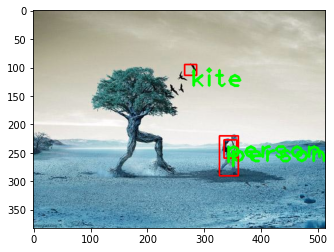

In [57]:
plt.imshow(img);

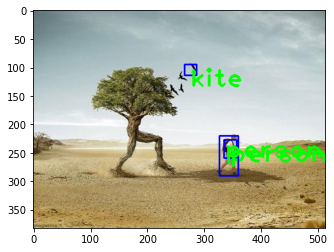

In [56]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

# Creating the model

In [45]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

# Creating class labels for COCO

In [46]:
classLabels = []
file_name = 'labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [47]:
print(classLabels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


# Configuring the inputs of model

In [48]:
model.setInputSize(320, 320)
model.setInputScale(1.0/ 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

<dnn_Model 00000201E0ADD8B0>

In [52]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.50)

In [53]:
print(ClassIndex)

[[38]
 [ 1]
 [ 1]]


# Creating a rectangular shape around the detected object

In [54]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,0,0), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color = (0, 255, 0), thickness = 3)

# Showing the final output

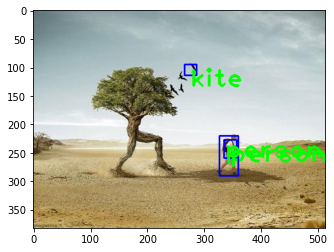

In [55]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));